In [283]:
########                            IBM-312 Project
######## Restaurant Recommendation by text and sentiment analysis of Zomato reviews
######## Grp no: 4
######## Shivam Yadav(20115135), Rohit Pal(20115116), Anjani Kumar Tiwari(20115015)

In [284]:
#importing libraries 
import nltk
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")


In [285]:
########Text analysis of reviews########

In [286]:
reviews = pd.read_csv("Restaurant reviews.csv")    #reading csv file that contains reviews of customers

In [287]:
reviews.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0


In [288]:
R1=reviews.iloc[:100,:]      # selecting first 100 rows of the dataset as each restaurant has 100 reviews
R1.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
95,Beyond Flavours,Gaurav Saini,Was there for office lunch outing. Rating woul...,3,"5 Reviews , 7 Followers",05-04-2019 16:56,0
96,Beyond Flavours,Kailash Sain,I really enjoyed the follows....\nThe entrance...,5,1 Review,05-03-2019 20:10,0
97,Beyond Flavours,KAILASH SAIN,I came first time in this restaurant.\nThe ent...,5,1 Review,05-03-2019 20:06,0
98,Beyond Flavours,Yaswanth Chowdary,Pathetic and horrible experience\nAmbience and...,2,"4 Reviews , 56 Followers",05-03-2019 11:40,0
99,Beyond Flavours,Aditya,Ahmed was serving us. Polite and very cooperat...,4,"4 Reviews , 46 Followers",05-02-2019 23:28,1


In [289]:
reviews_combined = " ".join(R1.Review.values)   #joing all reviews to form single string


In [290]:
#making word-cloud
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=50,random_state = 46333, stopwords = None).\
generate_from_text(reviews_combined)

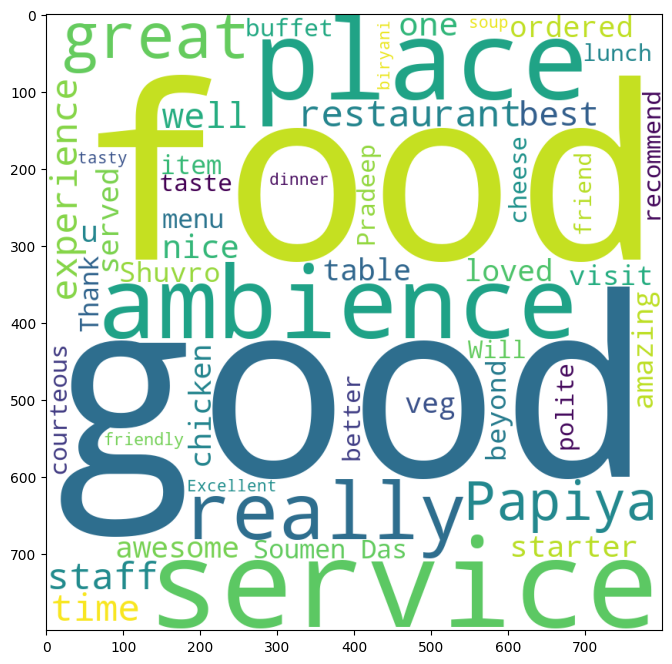

In [291]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [292]:
stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + list(punctuation) + ["n't","....","....."]


In [293]:
stop_updated.remove("not")           # updating the default stop words
stop_updated.remove("n't")
stop_updated.remove("didn't")
stop_updated.remove("isn't")
stop_updated.remove("shouldn't")
stop_updated.remove("mustn't")

In [294]:
#function for cleaning the text: converting to lowercase, removing punctuations and stemming
def clean_txt(sent):       
    tokens = word_tokenize(str(sent).lower())
    lemmatized = [lemm.lemmatize(term, pos = "v") for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(lemmatized)
    return res

In [295]:
a = R1.Review.apply(clean_txt)

In [296]:
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2)) #bigram analysis

In [297]:
X_bigram = bigram_count_vectorizer.fit_transform(a)

In [298]:
X_bigram

<100x2176 sparse matrix of type '<class 'numpy.int64'>'
	with 2549 stored elements in Compressed Sparse Row format>

In [299]:
#forming DTM for reviews of each restaurant
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())
DTM_bigram

,1300 odd,1st time,30 40,30mins get,40 mins,45mins get,4star restaurant,5star ambeince,700 fill,absolute delight,...,yuck guy,yum appricot,yum should,yumm ice,yumm lasagne,yummy cant,zomato finally,zomato gold,zomato spread,zomato stand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

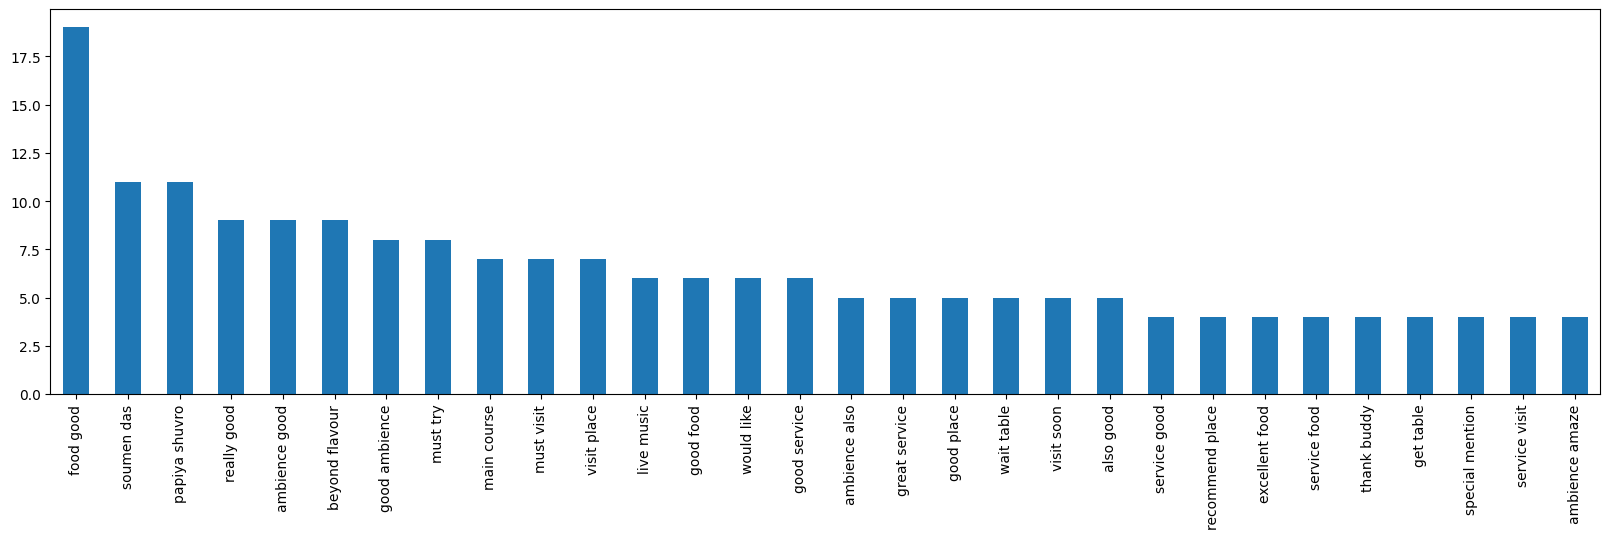

In [300]:
#plotting frequency vs word histogram
DTM_bigram.sum().sort_values(ascending=False).head(30).plot.bar(figsize=(20,5)) 

In [301]:
DTM_bigram["food good"].sum()

19

In [302]:
unigram_count_vectorizer = CountVectorizer(ngram_range=(1,1))

In [303]:
X_bigram1 = unigram_count_vectorizer.fit_transform(a)
DTM_bigram1 = pd.DataFrame(X_bigram1.toarray(), columns=unigram_count_vectorizer.get_feature_names())
DTM_bigram1

,1300,1st,30,30mins,40,45mins,4star,5star,700,absolute,...,worthwhile,would,wrlcome,yes,yesterday,yuck,yum,yumm,yummy,zomato
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

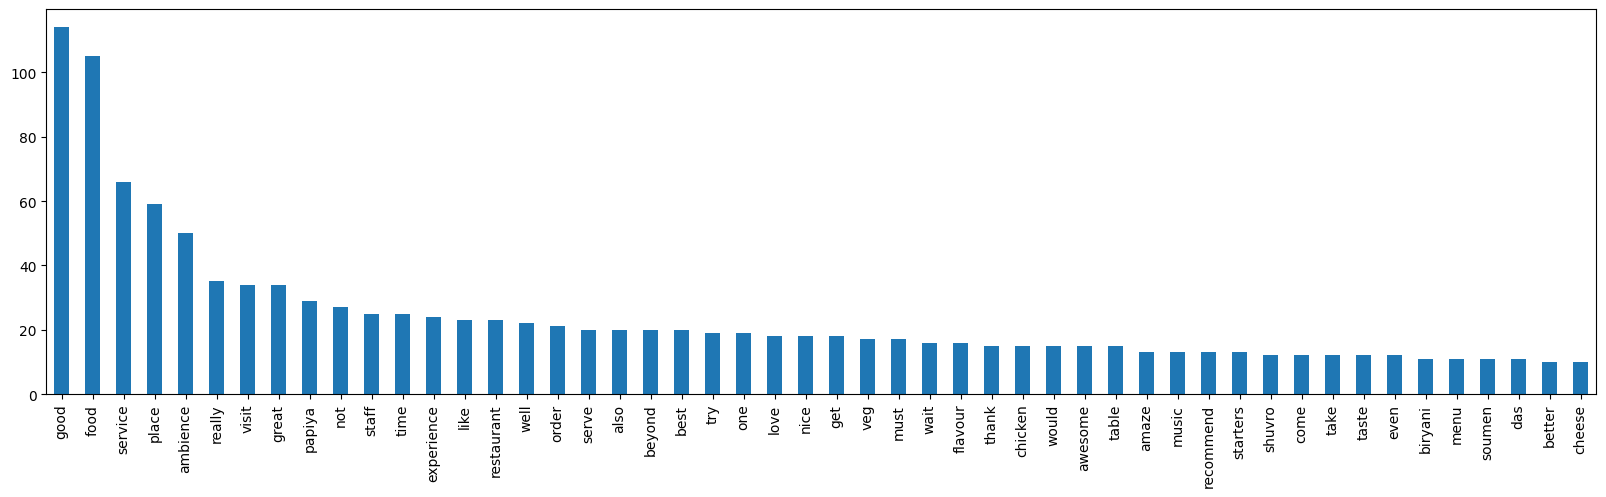

In [304]:
DTM_bigram1.sum().sort_values(ascending=False).head(50).plot.bar(figsize=(20,5)) 

In [305]:
DTM_bigram1["good"].sum()

114

In [306]:
DTM_bigram1["worst"].sum()

4

In [307]:
res=[]

In [308]:
#calculating the quality index of restaurant based on reviews observed
for x in range(0, 10000, 100):
    r=0
    R1=reviews.iloc[x:x+100,:]
    a = R1.Review.apply(clean_txt)
    bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2))
    X_bigram = bigram_count_vectorizer.fit_transform(a)
    DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())
    if 'food good' in DTM_bigram.columns :
        r=r+(DTM_bigram["food good"].sum())
    if 'not good' in DTM_bigram.columns :
        r=r-(DTM_bigram["not good"].sum())
    if 'good food' in DTM_bigram.columns :
        r=r+(DTM_bigram["good food"].sum())
    if 'really good' in DTM_bigram.columns :
        r=r+(DTM_bigram["really good"].sum())
    if 'good service' in DTM_bigram.columns :
        r=r+(DTM_bigram["good service"].sum())
    if 'very bad' in DTM_bigram.columns :
        r=r-(DTM_bigram["very bad"].sum())
    unigram_count_vectorizer = CountVectorizer(ngram_range=(1,1))
    X_bigram1 = unigram_count_vectorizer.fit_transform(a)
    DTM_bigram1 = pd.DataFrame(X_bigram1.toarray(), columns=unigram_count_vectorizer.get_feature_names())
    if 'good' in DTM_bigram1.columns :
        r=r+(DTM_bigram1["good"].sum())
    if 'best' in DTM_bigram1.columns :
        r=r+(DTM_bigram1["best"].sum())
    if 'bad' in DTM_bigram1.columns :
        r=r-(DTM_bigram1["bad"].sum())
    if 'worst' in DTM_bigram1.columns :
        r=r-(DTM_bigram1["worst"].sum())
    res.append(r)

In [309]:
res

[158,
 257,
 151,
 58,
 120,
 109,
 51,
 40,
 133,
 54,
 44,
 139,
 73,
 130,
 123,
 29,
 116,
 3,
 131,
 22,
 50,
 112,
 115,
 39,
 119,
 116,
 91,
 129,
 39,
 44,
 131,
 68,
 146,
 93,
 115,
 47,
 96,
 35,
 128,
 130,
 124,
 43,
 66,
 65,
 124,
 25,
 62,
 70,
 63,
 70,
 117,
 17,
 102,
 112,
 26,
 86,
 112,
 38,
 53,
 96,
 193,
 137,
 9,
 97,
 38,
 81,
 73,
 72,
 154,
 200,
 144,
 99,
 70,
 112,
 44,
 50,
 97,
 115,
 112,
 93,
 53,
 27,
 61,
 52,
 78,
 51,
 41,
 97,
 4,
 0,
 170,
 142,
 79,
 94,
 55,
 35,
 113,
 112,
 45,
 131]

In [310]:
len(res)

100

In [311]:
norm = [round(float(i)/max(res),4) for i in res]    # normalizing the quality index values

In [312]:
norm

[0.6148,
 1.0,
 0.5875,
 0.2257,
 0.4669,
 0.4241,
 0.1984,
 0.1556,
 0.5175,
 0.2101,
 0.1712,
 0.5409,
 0.284,
 0.5058,
 0.4786,
 0.1128,
 0.4514,
 0.0117,
 0.5097,
 0.0856,
 0.1946,
 0.4358,
 0.4475,
 0.1518,
 0.463,
 0.4514,
 0.3541,
 0.5019,
 0.1518,
 0.1712,
 0.5097,
 0.2646,
 0.5681,
 0.3619,
 0.4475,
 0.1829,
 0.3735,
 0.1362,
 0.4981,
 0.5058,
 0.4825,
 0.1673,
 0.2568,
 0.2529,
 0.4825,
 0.0973,
 0.2412,
 0.2724,
 0.2451,
 0.2724,
 0.4553,
 0.0661,
 0.3969,
 0.4358,
 0.1012,
 0.3346,
 0.4358,
 0.1479,
 0.2062,
 0.3735,
 0.751,
 0.5331,
 0.035,
 0.3774,
 0.1479,
 0.3152,
 0.284,
 0.2802,
 0.5992,
 0.7782,
 0.5603,
 0.3852,
 0.2724,
 0.4358,
 0.1712,
 0.1946,
 0.3774,
 0.4475,
 0.4358,
 0.3619,
 0.2062,
 0.1051,
 0.2374,
 0.2023,
 0.3035,
 0.1984,
 0.1595,
 0.3774,
 0.0156,
 0.0,
 0.6615,
 0.5525,
 0.3074,
 0.3658,
 0.214,
 0.1362,
 0.4397,
 0.4358,
 0.1751,
 0.5097]

In [313]:
########Sentiment analysis of reviews########

In [314]:
data_review = pd.read_csv('Restaurant reviews.csv')
data_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [315]:
def clean_txt1(sent):
    tokens = word_tokenize(sent.lower())
    stop_updated = stopwords.words("english") + list(punctuation)
    final_word = [term for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [316]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
x=analyser.polarity_scores("Do try.. not great food and not great ambience")
x['compound']

-0.7641

In [317]:
df = pd.read_csv('Restaurant reviews.csv', usecols = ['Review','Restaurant'])
# print(df['Restaurant'])
comp_senti={}
for i in range(100):  # loop iterating over restaurants 
    x=0.00
    rest = df['Restaurant'][i*100]
    for j in range(100):  # loop iterating over reviews
        review = df['Review'][i*100+j]
        score = np.round(analyser.polarity_scores(review)['compound'],4)
        x=x+round(score,2)
    x=x/100;
    comp_senti[rest]=x
    
print(comp_senti)

{'Beyond Flavours': 0.6632999999999997, 'Paradise': 0.8271000000000001, 'Flechazo': 0.7906999999999997, 'Shah Ghouse Hotel & Restaurant': 0.2887, 'Over The Moon Brew Company': 0.7777999999999996, "The Fisherman's Wharf": 0.7707999999999998, 'eat.fit': 0.35429999999999995, 'Shah Ghouse Spl Shawarma': 0.3361000000000001, 'Hyper Local': 0.5959, 'Cream Stone': 0.48400000000000015, "Sardarji's Chaats & More": 0.28920000000000007, 'Barbeque Nation': 0.7156, 'Absolute Sizzlers': 0.4900999999999998, 'The Lal Street - Bar Exchange': 0.5297999999999999, "AB's - Absolute Barbecues": 0.9031999999999997, 'KFC': 0.11280000000000001, 'NorFest - The Dhaba': 0.6715999999999999, 'Hotel Zara Hi-Fi': -0.09550000000000004, '10 Downing Street': 0.6598999999999998, 'Pakwaan Grand': 0.11199999999999997, '13 Dhaba': 0.36689999999999984, "Jonathan's Kitchen - Holiday Inn Express & Suites": 0.5892, 'B-Dubs': 0.882, 'Amul': 0.32010000000000005, 'SKYHY': 0.5595, 'Tiki Shack': 0.5744999999999998, 'Mustang Terrace L

In [318]:
df = pd.DataFrame(list(comp_senti.items()),columns=['Restaurant','Compound sentiments'])

df.head()


,Restaurant,Compound sentiments
0,Beyond Flavours,0.6633
1,Paradise,0.8271
2,Flechazo,0.7907
3,Shah Ghouse Hotel & Restaurant,0.2887
4,Over The Moon Brew Company,0.7778


In [319]:
#####classifying restaurants with available cuisines#####

In [320]:
reviews = pd.read_csv("Restaurant names and Metadata.csv")  

reviews.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [321]:
dif=reviews["Cuisines"]

In [322]:
reviews_combined=""
reviews_combined =  ",".join(dif)
reviews_combined=reviews_combined.replace(" ","")# care that origianal string remains unchanged
# print(reviews_combined)
words = []
words = (reviews_combined.lower()).split(',')
wfreq=[words.count(w) for w in words]
dishes=dict(zip(words,wfreq))
print(dishes)

{'chinese': 43, 'continental': 21, 'kebab': 6, 'european': 4, 'southindian': 9, 'northindian': 61, 'biryani': 16, 'asian': 15, 'mediterranean': 5, 'desserts': 13, 'seafood': 4, 'beverages': 5, 'goan': 1, 'healthyfood': 1, 'lebanese': 1, 'american': 6, 'icecream': 2, 'streetfood': 2, 'fastfood': 15, 'bbq': 2, 'italian': 14, 'fingerfood': 2, 'burger': 5, 'japanese': 2, 'salad': 5, 'sushi': 4, 'mexican': 1, 'mughlai': 6, 'andhra': 6, 'bakery': 7, 'juices': 1, 'arabian': 2, 'hyderabadi': 4, 'cafe': 6, 'spanish': 1, 'wraps': 1, 'thai': 3, 'indonesian': 1, 'modernindian': 2, 'momos': 4, 'pizza': 1, 'northeastern': 1, 'mithai': 1, 'malaysian': 1}


In [323]:
#making a dictionary with cuisine as key and corresponding restaurants as values
from collections import defaultdict
myIndex = defaultdict(list)
for i in dishes:
    for j in range(105):                
        if (dif[j].lower()).find(i)!=-1 :
            myIndex[i].append(j) 
        else:
            continue
myIndex

defaultdict(list,
            {'chinese': [0,
              1,
              3,
              4,
              8,
              12,
              17,
              18,
              19,
              24,
              26,
              31,
              32,
              35,
              36,
              44,
              45,
              46,
              47,
              48,
              49,
              51,
              52,
              53,
              57,
              60,
              62,
              63,
              64,
              65,
              66,
              70,
              77,
              79,
              81,
              82,
              84,
              92,
              95,
              96,
              99,
              102,
              104],
             'continental': [0,
              4,
              5,
              6,
              12,
              18,
              24,
              25,
              38,
              39,
        

In [324]:
##### merging things together #####

In [325]:
final_df=pd.DataFrame()
final_df['Restaurant']=reviews['Name']
final_df['Cost']=reviews['Cost']
final_df['Compound sentiments']=df['Compound sentiments']
final_df['Quality Index']=pd.DataFrame(norm)
final_df.head()

,Restaurant,Cost,Compound sentiments,Quality Index
0,Beyond Flavours,800,0.6633,0.6148
1,Paradise,800,0.8271,1.0000
2,Flechazo,"1,300",0.7907,0.5875
3,Shah Ghouse Hotel & Restaurant,800,0.2887,0.2257
4,Over The Moon Brew Company,"1,200",0.7778,0.4669


In [326]:
#final_df.to_excel("final data.xlsx")

In [327]:
# p="fish"
# p="continental"
# if p in myIndex:
#     print(p,myIndex[p])

In [328]:
from operator import itemgetter
def predict_restraunts(dish,amount,myIndex,final_df):
    dish=dish.lower()
    maxi=0
    mini_id=0
    maxi_id=0
    mini=1000000000000
    if(amount.isnumeric()):
        amount=int(amount)
       # print(myIndex.get(dish))
#         print(myIndex.find(dish))
        if dish in myIndex:
            #print(dish,myIndex[dish])
            index=myIndex[dish]
            cost_list=[]
            for i in index:
                if int(final_df['Cost'][i].replace(',', ''))<=amount+200 and int(final_df['Cost'][i].replace(',', ''))>=max(amount-200,0):
                    cost_list.append(i)
                else:

                    mini=min(mini,int(final_df['Cost'][i].replace(',', '')))
                    if mini==int(final_df['Cost'][i].replace(',', '')):
                      mini_id=i
                    maxi=max(maxi,int(final_df['Cost'][i].replace(',', '')))
                    if maxi==int(final_df['Cost'][i].replace(',', '')):
                      maxi_id=i

            print("List of Recommended Restaurants Priority-wise:\n ")
            if not cost_list:
                if amount<mini:
                    print("Restaurant: ",final_df['Restaurant'][mini_id], " Expected Cost: ",final_df['Cost'][mini_id])
                else:
                    print("Restaurant: ",final_df['Restaurant'][maxi_id], " Expected Cost: ",final_df['Cost'][maxi_id])
                return
            else:

                maxi=0
                restaurant_list=[]
                for i in cost_list:


                    if final_df['Quality Index'][i]!=" ":
                        review_cost=float(final_df['Quality Index'][i])*float(final_df['Compound sentiments'][i])
                        restaurant_list.append([i,review_cost])
                        sorted(restaurant_list, key=itemgetter(1))
                for i in range(0,len(restaurant_list)):
                    print("Restaurant: ",final_df['Restaurant'][restaurant_list[len(restaurant_list)-i-1][0]], ";  Expected Cost: ",final_df['Cost'][restaurant_list[len(restaurant_list)-i-1][0]])
        else:

            print("Try some other name!")
            return
    else:
        print("Enter a positive and integer value of money")
        return

    return


In [332]:
##### User Inputs & Showing Output

In [333]:
a=input('Give the name of dish: ')  #taking input of Dish from user

Give the name of dish: burger


In [334]:
b=input('Enter your preferred budget: ')    #taking input of preferred budget from user

Enter your preferred budget: 500


In [336]:
predict_restraunts(a,b,myIndex,final_df)   # showing final priority list to user

List of Recommended Restaurants Priority-wise:
 
Restaurant:  Dunkin' Donuts ;  Expected Cost:  550
Restaurant:  American Wild Wings ;  Expected Cost:  600
Restaurant:  GD's ;  Expected Cost:  500
Restaurant:  Tandoori Food Works ;  Expected Cost:  500
Restaurant:  KFC ;  Expected Cost:  500
